In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import xarray as xr

data = xr.open_dataset("data/delhi_cpcb_2022.nc")
# data = xr.open_dataset("delhi_cpcb_2022.nc")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [2]:
df = data.to_dataframe().reset_index()

wd1 = pd.read_csv('data/wind_temp_shifted.csv')
wd2 = pd.read_csv('data/wind_temp2.csv')

wd1['time'] = pd.to_datetime(wd1['time'])
wd2['time'] = pd.to_datetime(wd2['time'])

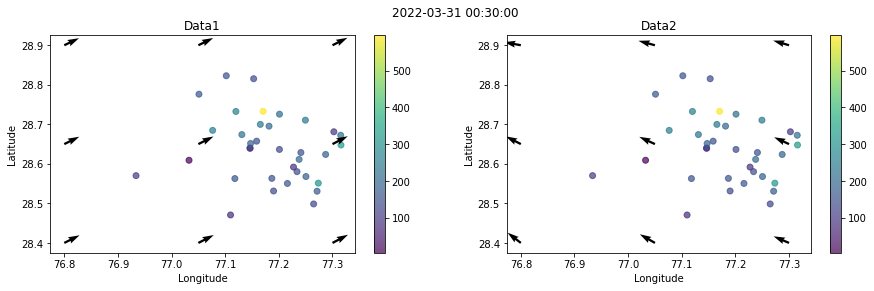

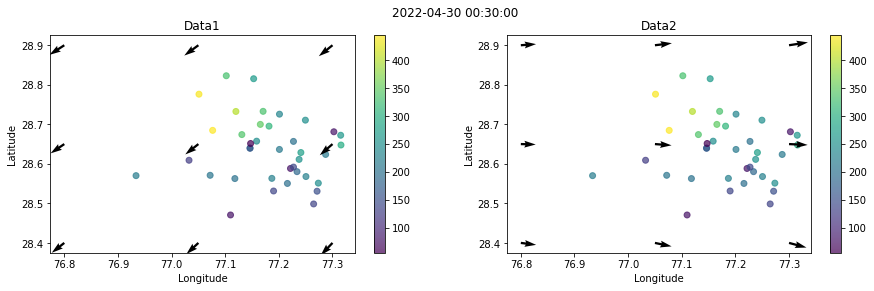

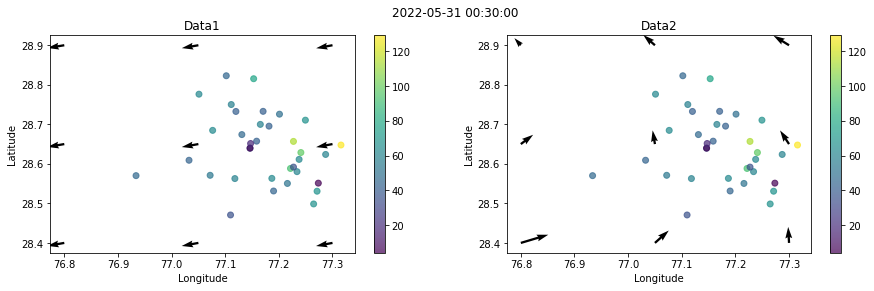

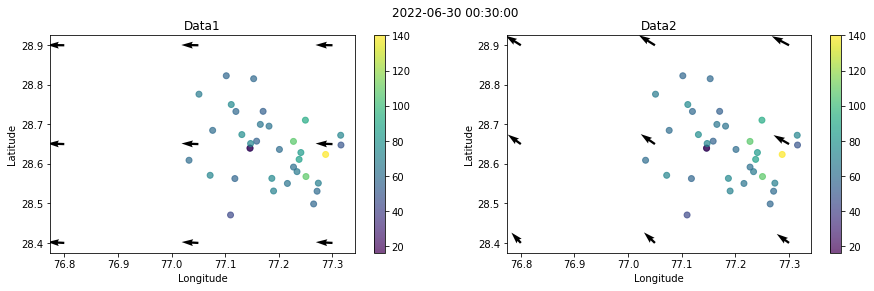

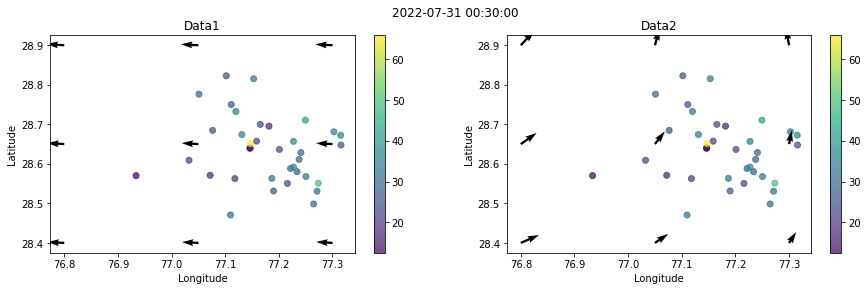

In [12]:
p = pd.date_range(start='2022-03-01 00:30:00', end='2022-08-15 01:30:00', freq = '1M').to_frame(name='dates')

for i in p['dates']:
    df_i = df[df['time'] == i]
    wd1_i = wd1[wd1['time'] == i]
    wd2_i = wd2[wd2['time'] == i]
    
    plt.figure(figsize = (15, 4))
    plt.suptitle(i)
    plt.subplot(1, 2, 1)
    plt.title('Data1')
    plt.scatter(df_i['longitude'], df_i['latitude'], c = df_i['PM2.5'], alpha = 0.7)
    plt.colorbar()
    plt.quiver(wd1_i['longitude'], wd1_i['latitude'], wd1_i['u'], wd1_i['v'])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.subplot(1, 2, 2)
    plt.title('Data2')
    plt.scatter(df_i['longitude'], df_i['latitude'], c = df_i['PM2.5'], alpha = 0.7)
    plt.colorbar()
    plt.quiver(wd2_i['longitude'], wd2_i['latitude'], wd2_i['u10'], wd2_i['v10'])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [10]:
p = pd.date_range(start='2022-03-01 00:30:00', end='2022-08-15 01:30:00', freq = '1M').to_frame(name='dates')

for i in p['dates']:
    df_i = df[df['time'] == i]
    wd1_i = wd1[wd1['time'] == i]
    wd2_i = wd2[wd2['time'] == i]
    
    print(i)
    print(wd1_i['u'].mean(), wd1_i['v'].mean())
    print(wd2_i['u10'].mean(), wd2_i['v10'].mean())

2022-03-31 00:30:00
16.905834197998047 8.480089982350668
-1.958977911207411 0.8411273161570231
2022-04-30 00:30:00
-4.078656832377116 -3.2707104947831898
2.6368751525878906 -0.11561032136281327
2022-05-31 00:30:00
-26.801462597317165 -4.7944775157504615
0.09207789103190105 1.1797339651319716
2022-06-30 00:30:00
-44.512184143066406 1.441574149661594
-2.9602057139078775 2.0704240798950195
2022-07-31 00:30:00
-23.89764976501465 1.3405993779500325
0.8118342889679803 1.1238407691319783
